In [214]:
import os

import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import spacy

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_colwidth', -1)
sns.set()
%matplotlib inline

In [215]:
path = os.path.join('..', 'cache')
filename = 'train.csv'
filepath = os.path.join(path, filename)
filepath

'../cache/train.csv'

In [216]:
df_train = pd.read_csv(os.path.join(path, 'train.csv'))
df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0


In [218]:
X = df_train.loc[:, 'question_text']
y = df_train.loc[:, 'target']
indices = df_train.index.values 
X.shape, y.shape, indices.shape

((1306122,), (1306122,), (1306122,))

In [221]:
X.head()

0    How did Quebec nationalists see their province as a nation in the 1960s?         
1    Do you have an adopted dog, how would you encourage people to adopt and not shop?
2    Why does velocity affect time? Does velocity affect space geometry?              
3    How did Otto von Guericke used the Magdeburg hemispheres?                        
4    Can I convert montra helicon D to a mountain bike by just changing the tyres?    
Name: question_text, dtype: object

Lemmatize with Spacy

In [222]:
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

In [223]:
%%time
#creating generator spacy_docs
spacy_docs = nlp.pipe(X)
#cast spacY_docs in list
#lst = list(spacy_docs)
lemmas = [[t.lemma_ if t.lemma_ != "-PRON-" else t.text for t in doc] for doc in spacy_docs]
lemmas_as_strings = [" ".join(x) for x in lemmas]
lemmas_as_strings

CPU times: user 30min 17s, sys: 6min 52s, total: 37min 10s
Wall time: 24min 20s


In [225]:
X_tokenized = lemmas_as_strings
X_tokenized

['how do quebec nationalist see their province as a nation in the 1960 ?',
 'do you have an adopt dog , how would you encourage people to adopt and not shop ?',
 'why do velocity affect time ? do velocity affect space geometry ?',
 'how do otto von guericke use the magdeburg hemisphere ?',
 'can I convert montra helicon d to a mountain bike by just change the tyre ?',
 'be gaza slowly become auschwitz , dachau or treblinka for palestinians ?',
 'why do quora automatically ban conservative opinion when report , but do not do the same for liberal view ?',
 'be it crazy if I wash or wipe my grocery off ? germ be everywhere .',
 'be there such a thing as dress moderately , and if so , how be that different than dress modestly ?',
 'be it just me or have you ever be in this phase wherein you become ignorant to the people you once love , completely disregard their feeling / life so you get to have something go your way and feel temporarily at ease . how do thing change ?',
 'what can you say

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X_tokenized, y, test_size=.2, random_state=44, stratify=y)
len(X_train), len(y_train), len(X_test), len(y_test)

(1044897, 1044897, 261225, 261225)

**TfidfVectorizer and LogisticRegression**

In [285]:
tfid = TfidfVectorizer(stop_words='english')

In [286]:
#mnb = MultinomialNB()

In [287]:
lr = LogisticRegression(verbose=2)

In [288]:
pipe = Pipeline([('tfid', tfid),('lr', lr)])

In [289]:
pipe.fit(X_train, y_train)

/Users/hellososo/bin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=2, warm_start=False))])

In [292]:
y_pred = pipe.predict(X_test)

In [293]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [294]:
pipe.score(X_test, y_test)

0.9498363479758829

In [295]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    245063
           1       0.67      0.37      0.47     16162

   micro avg       0.95      0.95      0.95    261225
   macro avg       0.82      0.68      0.72    261225
weighted avg       0.94      0.95      0.94    261225



**Predict_proba**

In [383]:
y_proba = pipe.predict_proba(X_test)

In [384]:
y_proba

array([[0.99746035, 0.00253965],
       [0.98761481, 0.01238519],
       [0.97083476, 0.02916524],
       ...,
       [0.0234925 , 0.9765075 ],
       [0.95410244, 0.04589756],
       [0.99861992, 0.00138008]])

In [385]:
#collections.Counter(y_proba[:, 1])

In [415]:
np.median(y_proba[:, 1]), np.mean(y_proba[:, 1]), collections.Counter(y_proba[:, 1]>0.35)

(0.012295014768201116,
 0.062350129661498534,
 Counter({False: 247881, True: 13344}))

In [452]:
y_pred_p = [1 if proba > 0.3 else 0 for proba in y_proba[:, 1]]

In [453]:
pipe.score(X_test, y_test)

0.9498363479758829

In [454]:
cr = classification_report(y_test, y_pred_p)

In [455]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    245063
           1       0.59      0.56      0.57     16162

   micro avg       0.95      0.95      0.95    261225
   macro avg       0.78      0.77      0.77    261225
weighted avg       0.95      0.95      0.95    261225



In [450]:
cm = confusion_matrix(y_test, y_pred_p)
cm

array([[236944,   8119],
       [  6184,   9978]])

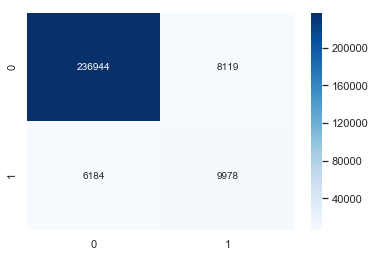

In [451]:
sns.heatmap(cm, cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique(), annot=True, fmt='.0f');

In [393]:
X_new = X_test.copy()
X_new

['what be the carbon atom structure of nitous oxide ?',
 'how can I uninstall microsoft professional plus office 2013 from my pc ?',
 'why do people tell me frequently " You be build like a linebacker ? " what do it mean ?',
 'what be the negativ , e impact of civilization on islam ?',
 'can I teach myself how to draw ? how can I ? how do you teach yourself ? I be still a teenager . 14 to be exact !',
 'will salary be give to cbi sub inspector during training ?',
 'how do we disprove the myth of male privilege ?',
 'be there any educate muslim in india ? do muslims go to school in india ?',
 'which school be the good near uppal in hyderabad ?',
 'how much salary I can demand for from quatar airway as cabin crew if I have 2year of fly experinence ?',
 'how be romania different from sweden ?',
 'how do the u.s. facilitate / instigate the over - throw of gaddafi ? how could we do the same to kju ?',
 'how much do you spend on the last item you buy for yourself ?',
 'how do socialcop manag

In [394]:
X_new = pd.DataFrame(X_new)

In [395]:
X_new.columns = ['question_text']

In [396]:
X_new.head()

,question_text
0,what be the carbon atom structure of nitous oxide ?
1,how can I uninstall microsoft professional plus office 2013 from my pc ?
2,"why do people tell me frequently "" You be build like a linebacker ? "" what do it mean ?"
3,"what be the negativ , e impact of civilization on islam ?"
4,can I teach myself how to draw ? how can I ? how do you teach yourself ? I be still a teenager . 14 to be exact !


**Add predict proba results to X_new dataframe**

In [408]:
X_new['prob_sincere'] = y_proba[:, 0]
X_new['prob_insincere'] = y_proba[:, 1]

In [413]:
X_new.head(20)

,question_text,prob_sincere,prob_insincere
0,what be the carbon atom structure of nitous oxide ?,0.997460,0.002540
1,how can I uninstall microsoft professional plus office 2013 from my pc ?,0.987615,0.012385
2,"why do people tell me frequently "" You be build like a linebacker ? "" what do it mean ?",0.970835,0.029165
3,"what be the negativ , e impact of civilization on islam ?",0.979819,0.020181
4,can I teach myself how to draw ? how can I ? how do you teach yourself ? I be still a teenager . 14 to be exact !,0.973277,0.026723
5,will salary be give to cbi sub inspector during training ?,0.993947,0.006053
6,how do we disprove the myth of male privilege ?,0.848927,0.151073
7,be there any educate muslim in india ? do muslims go to school in india ?,0.202234,0.797766
8,which school be the good near uppal in hyderabad ?,0.993408,0.006592
9,how much salary I can demand for from quatar airway as cabin crew if I have 2year of fly experinence ?,0.987187,0.012813


In [406]:
X_new['target'] = y_test

In [441]:
X_new.head()

,question_text,prob_sincere,prob_insincere
0,what be the carbon atom structure of nitous oxide ?,0.997460,0.002540
1,how can I uninstall microsoft professional plus office 2013 from my pc ?,0.987615,0.012385
2,"why do people tell me frequently "" You be build like a linebacker ? "" what do it mean ?",0.970835,0.029165
3,"what be the negativ , e impact of civilization on islam ?",0.979819,0.020181
4,can I teach myself how to draw ? how can I ? how do you teach yourself ? I be still a teenager . 14 to be exact !,0.973277,0.026723


In [411]:
del X_new['target']

In [412]:
X_new

,question_text,prob_sincere,prob_insincere
0,what be the carbon atom structure of nitous oxide ?,0.997460,0.002540
1,how can I uninstall microsoft professional plus office 2013 from my pc ?,0.987615,0.012385
2,"why do people tell me frequently "" You be build like a linebacker ? "" what do it mean ?",0.970835,0.029165
3,"what be the negativ , e impact of civilization on islam ?",0.979819,0.020181
4,can I teach myself how to draw ? how can I ? how do you teach yourself ? I be still a teenager . 14 to be exact !,0.973277,0.026723
5,will salary be give to cbi sub inspector during training ?,0.993947,0.006053
6,how do we disprove the myth of male privilege ?,0.848927,0.151073
7,be there any educate muslim in india ? do muslims go to school in india ?,0.202234,0.797766
8,which school be the good near uppal in hyderabad ?,0.993408,0.006592
9,how much salary I can demand for from quatar airway as cabin crew if I have 2year of fly experinence ?,0.987187,0.012813


In [419]:
y_target = pd.DataFrame(y_test)

In [421]:
df.set_index(['d'], append=True)

In [440]:
X_new

,question_text,prob_sincere,prob_insincere
0,what be the carbon atom structure of nitous oxide ?,0.997460,0.002540
1,how can I uninstall microsoft professional plus office 2013 from my pc ?,0.987615,0.012385
2,"why do people tell me frequently "" You be build like a linebacker ? "" what do it mean ?",0.970835,0.029165
3,"what be the negativ , e impact of civilization on islam ?",0.979819,0.020181
4,can I teach myself how to draw ? how can I ? how do you teach yourself ? I be still a teenager . 14 to be exact !,0.973277,0.026723
5,will salary be give to cbi sub inspector during training ?,0.993947,0.006053
6,how do we disprove the myth of male privilege ?,0.848927,0.151073
7,be there any educate muslim in india ? do muslims go to school in india ?,0.202234,0.797766
8,which school be the good near uppal in hyderabad ?,0.993408,0.006592
9,how much salary I can demand for from quatar airway as cabin crew if I have 2year of fly experinence ?,0.987187,0.012813
